<a href="https://colab.research.google.com/github/vgqf7/AIPROJECTUMSL/blob/main/AIPROJECTFINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

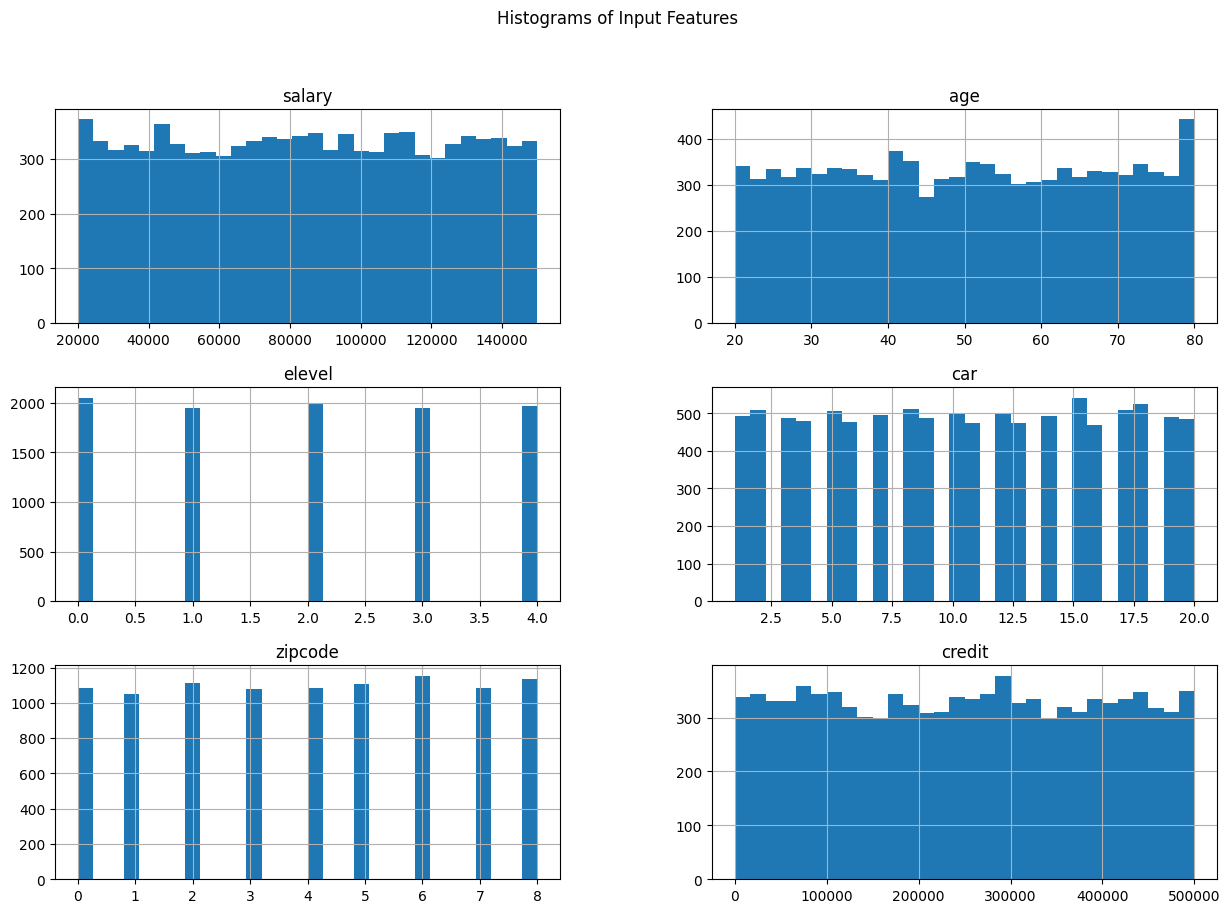

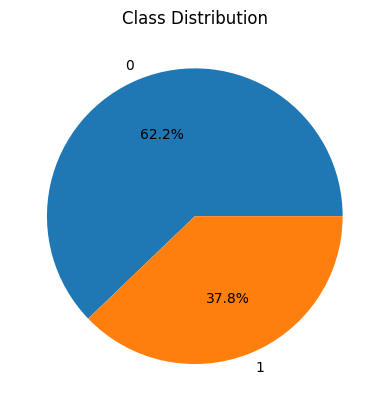

            salary  age  elevel  car  zipcode        credit  brand
0     119806.54480   45       0   14        4  442037.71130      0
1     106880.47840   63       1   11        6   45007.17883      1
2      78020.75094   23       0   15        2   48795.32279      0
3      63689.93635   51       3    6        5   40888.87736      1
4      50873.61880   20       3   14        4  352951.49770      0
...            ...  ...     ...  ...      ...           ...    ...
9893   87580.91422   75       1   18        8  282511.90950      1
9894  129181.38200   75       2    7        4  384871.36390      1
9895   97828.08884   66       2   15        0  399446.69620      1
9896   20000.00000   24       1   14        1  223204.64950      1
9897   96430.16419   34       1    2        7  224029.80700      0

[9898 rows x 7 columns]


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint


# Load dataset
data = pd.read_csv("CompleteResponses.csv")

# Distribution of each column
input_features = data.columns[:-1]
data[input_features].hist(bins=30, figsize=(15, 10))
plt.suptitle("Histograms of Input Features")
plt.show()

class_counts = data['brand'].value_counts()
plt.pie(class_counts, labels=['0', '1'], autopct='%1.1f%%')
plt.title("Class Distribution")
plt.show()
print(data)
# Normalization of data
normalized_data = (data - data.min(axis=0)) / (data.max(axis=0) - data.min(axis=0))

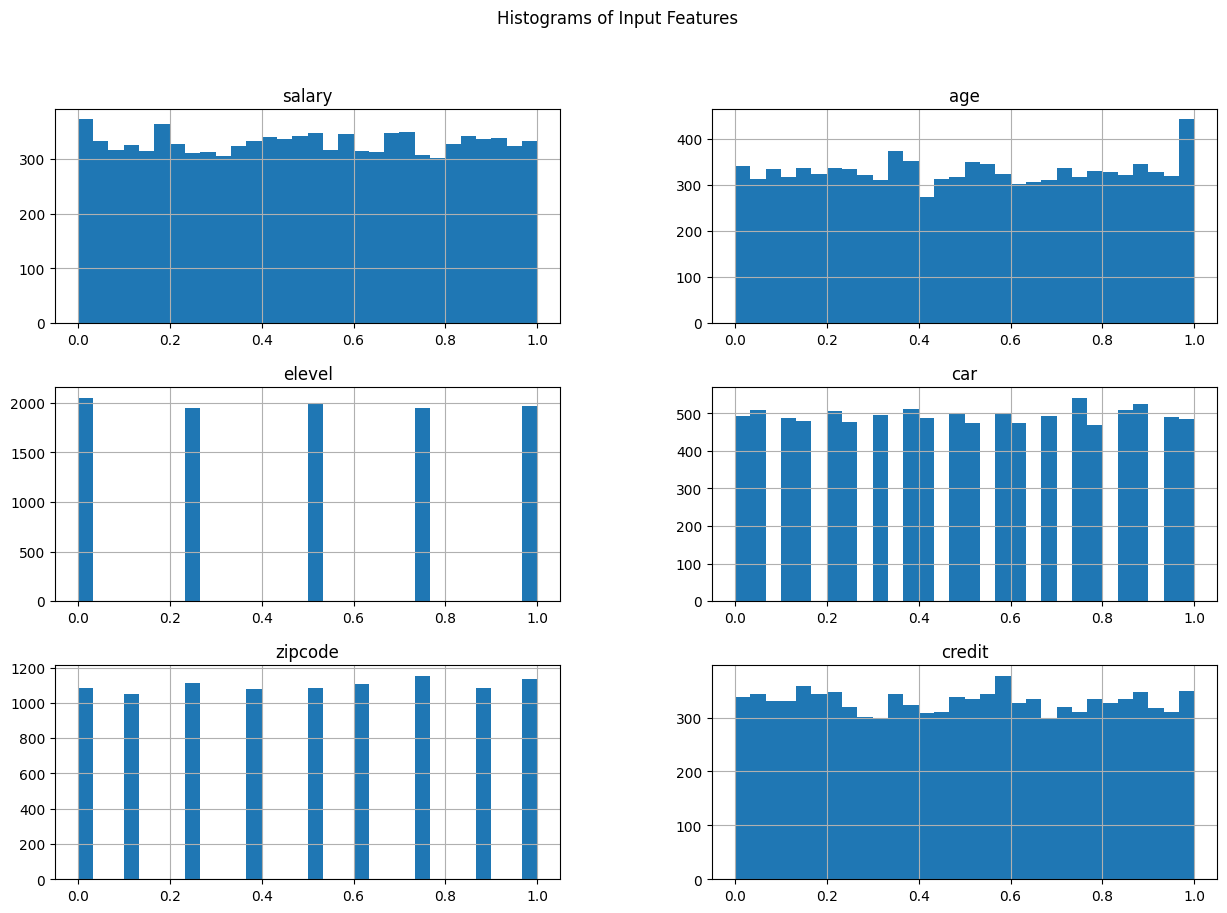

In [2]:
# Distribution of each column
input_features = normalized_data.columns[:-1]
normalized_data[input_features].hist(bins=30, figsize=(15, 10))
plt.suptitle("Histograms of Input Features")
plt.show()

#phase 2

In [3]:
# Split the data into features (X) and target (y)
X = normalized_data.drop("brand", axis=1)
y = normalized_data["brand"]
print(normalized_data)

# Train the data using Keras
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

checkpoint = ModelCheckpoint("best_model.h5", monitor='val_accuracy', verbose=0, save_best_only=True, mode='max')

history = model.fit(X, y, epochs=100, validation_split=0.2, verbose=0, callbacks=[checkpoint])

# Print the accuracy
best_model = tf.keras.models.load_model("best_model.h5")
_, train_accuracy = best_model.evaluate(X, y, verbose=0)
print(f"Train accuracy: {train_accuracy:.4f}")

        salary       age  elevel       car  zipcode    credit  brand
0     0.767743  0.416667    0.00  0.684211    0.500  0.884075    0.0
1     0.668311  0.716667    0.25  0.526316    0.750  0.090014    1.0
2     0.446313  0.050000    0.00  0.736842    0.250  0.097591    0.0
3     0.336076  0.516667    0.75  0.263158    0.625  0.081778    1.0
4     0.237489  0.000000    0.75  0.684211    0.500  0.705903    0.0
...        ...       ...     ...       ...      ...       ...    ...
9893  0.519853  0.916667    0.25  0.894737    1.000  0.565024    1.0
9894  0.839857  0.916667    0.50  0.315789    0.500  0.769743    1.0
9895  0.598678  0.766667    0.50  0.736842    0.000  0.798893    1.0
9896  0.000000  0.066667    0.25  0.684211    0.125  0.446409    1.0
9897  0.587924  0.233333    0.25  0.052632    0.875  0.448060    0.0

[9898 rows x 7 columns]
Train accuracy: 0.9248


In [4]:
# Train the data using Keras
model = Sequential()

model.add(Dense(256, activation='relu', input_shape=(X.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

checkpoint = ModelCheckpoint("best_model.h5", monitor='val_accuracy', verbose=0, save_best_only=True, mode='max')

history = model.fit(X, y, epochs=100, validation_split=0.2,verbose=0, callbacks=[checkpoint])

# Print the accuracy
best_model = tf.keras.models.load_model("best_model.h5")
_, train_accuracy = best_model.evaluate(X, y, verbose=0)
print(f"Train accuracy: {train_accuracy:.4f}")

Train accuracy: 0.9284


In [10]:
print(f"Validation accuracy: {val_accuracy:.4f}")

Validation accuracy: 0.5212


# phase 3

Single Layer Model

In [5]:
# Shuffle data
shuffled_data = normalized_data.sample(frac=1).reset_index(drop=True)

# Split data, test and validation
train_size = int(0.8 * len(shuffled_data))
X_train, X_val = shuffled_data.iloc[:train_size, :-1], shuffled_data.iloc[train_size:, :-1]
y_train, y_val = shuffled_data.iloc[:train_size, -1], shuffled_data.iloc[train_size:, -1]

# Train a single layer, single neuron model for validation dataset
model = Sequential()
model.add(Dense(1, activation='sigmoid', input_shape=(X_train.shape[1],)))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_val = ModelCheckpoint("best_model_val.h5", monitor='val_accuracy', verbose=0, save_best_only=True, mode='max')
checkpoint_train = ModelCheckpoint("best_model_train.h5", monitor='accuracy', verbose=0, save_best_only=True, mode='max')
history_val = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val),verbose=0, callbacks=[checkpoint_val, checkpoint_train])

# Print accuracy on both training and validation dataset
best_model_val = tf.keras.models.load_model("best_model_val.h5")
best_model_train = tf.keras.models.load_model("best_model_train.h5")
_, train_accuracy = best_model_train.evaluate(X_train, y_train, verbose=0)
_, val_accuracy = best_model_val.evaluate(X_val, y_val, verbose=0)
print(f"Train accuracy: {train_accuracy:.4f}, Validation accuracy: {val_accuracy:.4f}")

Train accuracy: 0.6235, Validation accuracy: 0.6152


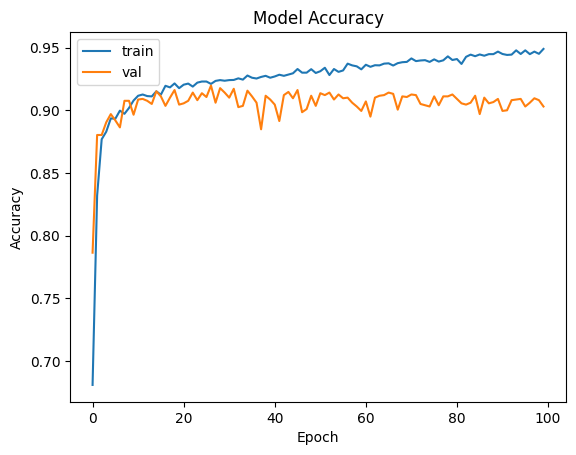

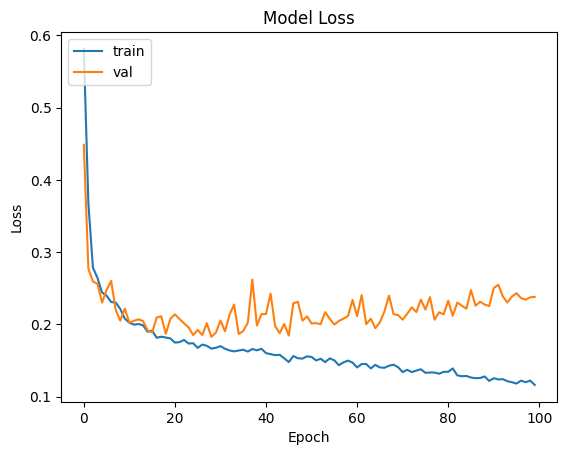

In [6]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


Multi Layer Model

In [7]:


# Train a deep model with a larger number of neurons for validation dataset
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_val = ModelCheckpoint("best_model_val.h5", monitor='val_accuracy', verbose=0, save_best_only=True, mode='max')
checkpoint_train = ModelCheckpoint("best_model_train.h5", monitor='accuracy', verbose=0, save_best_only=True, mode='max')
history_val = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), verbose=0,callbacks=[checkpoint_val, checkpoint_train])

# Print accuracy on both training and validation dataset
best_model_val = tf.keras.models.load_model("best_model_val.h5")
best_model_train = tf.keras.models.load_model("best_model_train.h5")
_, train_accuracy = best_model_train.evaluate(X_train, y_train, verbose=0)
_, val_accuracy = best_model_val.evaluate(X_val, y_val, verbose=0)
print(f"Train accuracy: {train_accuracy:.4f}, Validation accuracy: {val_accuracy:.4f}")


Train accuracy: 0.9716, Validation accuracy: 0.9152


Logistic Regression

Train accuracy: 0.5294, Validation accuracy: 0.5212
              precision    recall  f1-score   support

    Negative       0.19      0.07      0.11       761
    Positive       0.58      0.80      0.67      1219

    accuracy                           0.52      1980
   macro avg       0.38      0.44      0.39      1980
weighted avg       0.43      0.52      0.46      1980



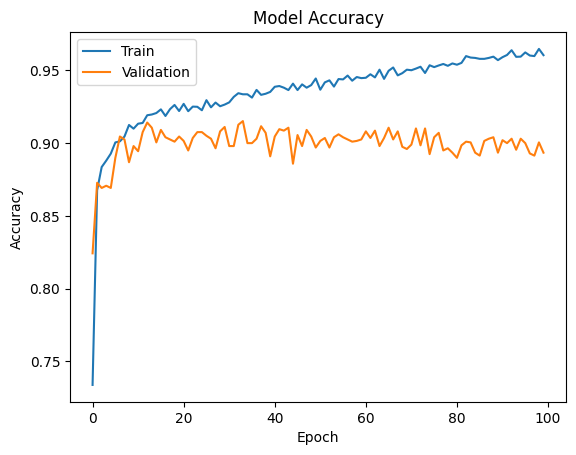

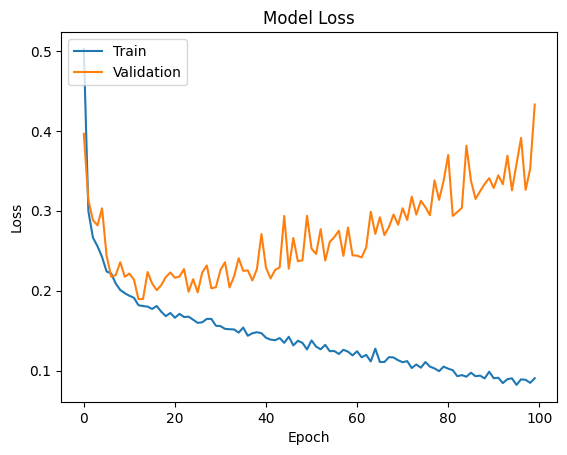

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Print accuracy on both training and validation dataset
train_accuracy = model.score(X_train, y_train)
val_accuracy = model.score(X_val, y_val)
print(f"Train accuracy: {train_accuracy:.4f}, Validation accuracy: {val_accuracy:.4f}")

# Make predictions on validation set
y_val_pred = model.predict(X_val)

# Calculate evaluation metrics
report = classification_report(y_val, y_val_pred, target_names=["Negative", "Positive"])

# Print evaluation metrics
print(report)

# Load the training history of the model (assuming history_val is defined)
history = history_val.history

# Plot the model accuracy over epochs
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the model loss over epochs
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


REDUCTION

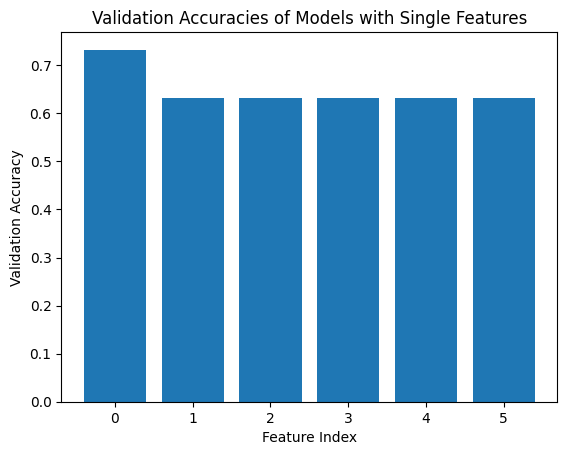

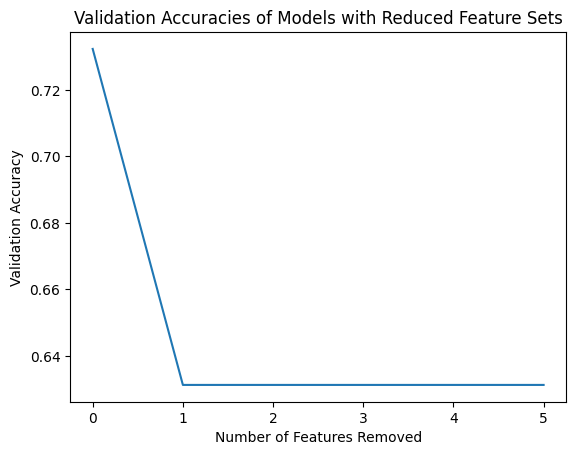

In [9]:


# Split the data into features (X) and target (y)
X = normalized_data.drop(columns=["brand"])
y = normalized_data["brand"]

# Get number of features
n_features = X.shape[1]

# Train models with single features
single_feature_accuracies = []
for i in range(n_features):
    # Select single feature
    X_single = X.iloc[:, i:i+1]
    # Split data into training and validation sets
    train_size = int(0.8 * len(X_single))
    X_train, X_val = X_single.iloc[:train_size], X_single.iloc[train_size:]
    y_train, y_val = y.iloc[:train_size], y.iloc[train_size:]
    # Build and train model
    model = Sequential([
        Dense(32, activation="relu", input_shape=[1]),
        Dense(64, activation="relu"),
        Dense(1, activation="sigmoid")
    ])
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    # Define checkpoint to save best model
    checkpoint = ModelCheckpoint("best_single_feature_model.h5", save_best_only=True, save_weights_only=True)
    # Train model with checkpointing
    model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, callbacks=[checkpoint], verbose=0)
    # Load best model and compute validation accuracy
    model.load_weights("best_single_feature_model.h5")
    _, accuracy = model.evaluate(X_val, y_val, verbose=0)
    single_feature_accuracies.append(accuracy)

# Plot single-feature accuracies
plt.bar(range(n_features), single_feature_accuracies)
plt.xlabel("Feature Index")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracies of Models with Single Features")
plt.show()

# Train models with reduced feature sets
reduced_feature_accuracies = [max(single_feature_accuracies)]
for i in range(1, n_features):
    # Select features to keep
    features_to_keep = np.argsort(single_feature_accuracies)[:n_features-i]
    X_reduced = X.iloc[:, features_to_keep]
    # Split data into training and validation sets
    train_size = int(0.8 * len(X_reduced))
    X_train, X_val = X_reduced.iloc[:train_size], X_reduced.iloc[train_size:]
    y_train, y_val = y.iloc[:train_size], y.iloc[train_size:]
    # Build and train model
    model = Sequential([
        Dense(32, activation="relu", input_shape=[X_reduced.shape[1]]),
        Dense(64, activation="relu"),
        Dense(1, activation="sigmoid")
    ])
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    # Define checkpoint to save best model
    checkpoint = ModelCheckpoint("best_reduced_feature_model.h5", save_best_only=True, save_weights_only=True)
    # Train model with checkpointing
    model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, callbacks=[checkpoint], verbose=0)
    # Load best model and compute validation accuracy
    model.load_weights("best_reduced_feature_model.h5")
    _, accuracy = model.evaluate(X_val, y_val, verbose=0)
    reduced_feature_accuracies.append(accuracy)
# Plot accuracies of models with reduced feature sets
plt.plot(range(len(reduced_feature_accuracies)), reduced_feature_accuracies)
plt.xlabel("Number of Features Removed")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracies of Models with Reduced Feature Sets")
plt.show()
